In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprice = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import statsmodels.api as sm

In [5]:
houseprice.head(20)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [6]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [7]:
houseprice.isnull().sum()*100/houseprice.isnull().count()

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
totrmsabvgrd      0.000000
functional        0.000000
fireplaces        0.000000
f

In [8]:
# drop the columns with high percentage of missing values
houseprice = houseprice.drop(['alley','fireplacequ','poolqc','fence','miscfeature'], axis=1)

In [9]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non

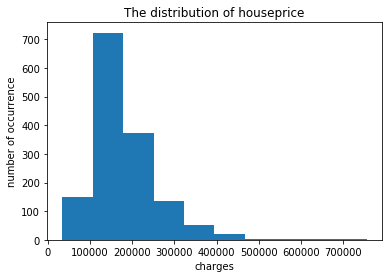

In [10]:
plt.hist(houseprice['saleprice'])
plt.title("The distribution of houseprice")
plt.xlabel("charges")
plt.ylabel("number of occurrence")
plt.show()

In [11]:
cat_hp=houseprice.select_dtypes(include='object')
print(cat_hp)

     mszoning street lotshape landcontour utilities lotconfig landslope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave     

In [12]:
cat_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
mszoning         1460 non-null object
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non-null object
masvnrtype       1452 non-null object
exterqual        1460 non-null object
extercond        1460 non-null object
foundation       1460 non-null object
bsmtqual         1423 non-null object
bsmtcond         1423 non-null object
bsmtexposure     1422 non-null object
bsmtfintype1     14

In [13]:
# Question??? numerical variables can be categorical not continious, what to do???
num_df = houseprice.select_dtypes(include=[np.number])


#con_hp1=houseprice.select_dtypes(include='int64')
#con_hp2=houseprice.select_dtypes(include='float64')
#con_hp=pd.concat([con_hp1, con_hp2])

In [14]:
print(num_df.head(10))

   id  mssubclass  lotfrontage  lotarea  overallqual  overallcond  yearbuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   
6   7          20         75.0    10084            8            5       2004   
7   8          60          NaN    10382            7            6       1973   
8   9          50         51.0     6120            7            5       1931   
9  10         190         50.0     7420            5            6       1939   

   yearremodadd  masvnrarea  bsmtfinsf1  ...  wooddecksf  openporchsf  \
0          2003       196.0         706  ...  

In [15]:
num_df=num_df.drop(columns=['saleprice'])

In [16]:
# check numerical variables missing values

num_df.isnull().sum()*100/num_df.isnull().count()

id                0.000000
mssubclass        0.000000
lotfrontage      17.739726
lotarea           0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
masvnrarea        0.547945
bsmtfinsf1        0.000000
bsmtfinsf2        0.000000
bsmtunfsf         0.000000
totalbsmtsf       0.000000
firstflrsf        0.000000
secondflrsf       0.000000
lowqualfinsf      0.000000
grlivarea         0.000000
bsmtfullbath      0.000000
bsmthalfbath      0.000000
fullbath          0.000000
halfbath          0.000000
bedroomabvgr      0.000000
kitchenabvgr      0.000000
totrmsabvgrd      0.000000
fireplaces        0.000000
garageyrblt       5.547945
garagecars        0.000000
garagearea        0.000000
wooddecksf        0.000000
openporchsf       0.000000
enclosedporch     0.000000
threessnporch     0.000000
screenporch       0.000000
poolarea          0.000000
miscval           0.000000
mosold            0.000000
yrsold            0.000000
d

In [17]:
# fill-in missing values for numeric variables
num_df['lotfrontage'] = num_df['lotfrontage'].fillna(num_df['lotfrontage'].value_counts().idxmax())
num_df['masvnrarea'] = num_df['masvnrarea'].fillna(num_df['masvnrarea'].value_counts().idxmax())
num_df['garageyrblt'] = num_df['garageyrblt'].fillna(num_df['garageyrblt'].value_counts().idxmax())

In [18]:
num_df.isnull().sum()*100/num_df.isnull().count()

id               0.0
mssubclass       0.0
lotfrontage      0.0
lotarea          0.0
overallqual      0.0
overallcond      0.0
yearbuilt        0.0
yearremodadd     0.0
masvnrarea       0.0
bsmtfinsf1       0.0
bsmtfinsf2       0.0
bsmtunfsf        0.0
totalbsmtsf      0.0
firstflrsf       0.0
secondflrsf      0.0
lowqualfinsf     0.0
grlivarea        0.0
bsmtfullbath     0.0
bsmthalfbath     0.0
fullbath         0.0
halfbath         0.0
bedroomabvgr     0.0
kitchenabvgr     0.0
totrmsabvgrd     0.0
fireplaces       0.0
garageyrblt      0.0
garagecars       0.0
garagearea       0.0
wooddecksf       0.0
openporchsf      0.0
enclosedporch    0.0
threessnporch    0.0
screenporch      0.0
poolarea         0.0
miscval          0.0
mosold           0.0
yrsold           0.0
dtype: float64

In [19]:
column_list=list(cat_hp.columns) 
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition']


In [20]:
num_column_list=list(num_df.columns) 
print(num_column_list)

['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold']


In [21]:
cat_hp.isnull().sum()*100/cat_hp.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.068493
kitchenqual      0.000000
functional       0.000000
garagetype       5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
dtype: float

In [22]:
print(len(cat_hp))

1460


In [23]:
houseprice["saleprice"].isnull().sum()*100/houseprice["saleprice"].isnull().count()

0.0

In [24]:
# append the target variable to cat_hp
#cat_hp_all=pd.concat([cat_hp, houseprice['saleprice']])

cat_hp_all=cat_hp.join(houseprice['saleprice'])
print(cat_hp_all)

     mszoning street lotshape landcontour utilities lotconfig landslope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave     

In [25]:
column_list=list(cat_hp_all.columns) 
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition', 'saleprice']


In [26]:
cat_hp_all.isnull().sum()*100/cat_hp_all.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.068493
kitchenqual      0.000000
functional       0.000000
garagetype       5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
saleprice   

In [27]:
print(len(column_list))

39


In [28]:
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition', 'saleprice']


In [29]:
# fill-in missing value for categorical variables

for column in column_list:
    for i in range(0, len(cat_hp_all)):
        if pd.isnull(cat_hp_all[column][i]):
            cat_hp_all[column][i] = cat_hp_all.fillna(cat_hp_all[column].value_counts().index[0],inplace=True)
            

                
        
#for i in range(0, len(cat_hp_all)):
   # for column in column_list:   
        #if pd.isnull(cat_hp_all[column][i]):
            #cat_hp_all[column][i] = cat_hp_all[column][i-1]
        


In [30]:
#print(cat_hp_all[column].value_counts())

In [31]:
cat_hp_all.isnull().sum()*100/cat_hp_all.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.068493
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         0.000000
bsmtcond         0.000000
bsmtexposure     0.000000
bsmtfintype1     0.000000
bsmtfintype2     0.000000
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.000000
kitchenqual      0.000000
functional       0.000000
garagetype       0.000000
garagefinish     0.000000
garagequal       0.000000
garagecond       0.000000
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
saleprice   

In [32]:
cat_hp_all['masvnrtype'].value_counts(dropna=False)

None       871
BrkFace    445
Stone      128
BrkCmn      15
NaN          1
Name: masvnrtype, dtype: int64

In [33]:
#print(cat_hp_all['masvnrtype'])

In [34]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
list(cat_hp_all.columns.values)

['mszoning',
 'street',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype',
 'salecondition',
 'saleprice']

In [37]:
# t_test or anova on the visual

In [38]:
import statsmodels.api as sm

In [39]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [40]:
len(column_list)

39

In [41]:
# convert variables into binary

#convert_list=convert_list.values.tolist()
#le = preprocessing.LabelEncoder()
#le.fit(convert_list)
new_column_list=column_list[0:37]

for col in new_column_list:
    cat_hp_all[col]=pd.get_dummies(cat_hp_all[col],drop_first=True)
    print(cat_hp_all.head(20))

    mszoning street lotshape landcontour utilities lotconfig landslope  \
0          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          0   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          0   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          0   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          0   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          0   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         0   Pave      IR2         L

[20 rows x 39 columns]
    mszoning  street  lotshape landcontour utilities lotconfig landslope  \
0          0       1         0         Lvl    AllPub    Inside       Gtl   
1          0       1         0         Lvl    AllPub       FR2       Gtl   
2          0       1         0         Lvl    AllPub    Inside       Gtl   
3          0       1         0         Lvl    AllPub    Corner       Gtl   
4          0       1         0         Lvl    AllPub       FR2       Gtl   
5          0       1         0         Lvl    AllPub    Inside       Gtl   
6          0       1         0         Lvl    AllPub    Inside       Gtl   
7          0       1         0         Lvl    AllPub    Corner       Gtl   
8          0       1         0         Lvl    AllPub    Inside       Gtl   
9          0       1         0         Lvl    AllPub    Corner       Gtl   
10         0       1         0         Lvl    AllPub    Inside       Gtl   
11         0       1         0         Lvl    AllPub    Inside   

    mszoning  street  lotshape  landcontour  utilities  lotconfig  landslope  \
0          0       1         0            0          0          0          0   
1          0       1         0            0          0          0          0   
2          0       1         0            0          0          0          0   
3          0       1         0            0          0          0          0   
4          0       1         0            0          0          0          0   
5          0       1         0            0          0          0          0   
6          0       1         0            0          0          0          0   
7          0       1         0            0          0          0          0   
8          0       1         0            0          0          0          0   
9          0       1         0            0          0          0          0   
10         0       1         0            0          0          0          0   
11         0       1         0          

    mszoning  street  lotshape  landcontour  utilities  lotconfig  landslope  \
0          0       1         0            0          0          0          0   
1          0       1         0            0          0          0          0   
2          0       1         0            0          0          0          0   
3          0       1         0            0          0          0          0   
4          0       1         0            0          0          0          0   
5          0       1         0            0          0          0          0   
6          0       1         0            0          0          0          0   
7          0       1         0            0          0          0          0   
8          0       1         0            0          0          0          0   
9          0       1         0            0          0          0          0   
10         0       1         0            0          0          0          0   
11         0       1         0          

In [42]:
# linear model OLS

# Y is the target variable
Y = cat_hp_all['saleprice']
X = pd.concat([cat_hp_all.iloc[:,0:37],num_df],axis=1) 
#pd.concat result in datafram
#np.concatenate results in arrays

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())


The number of observations in the training set is 1168
The number of observations in the test set is 292
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     81.32
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:07:02   Log-Likelihood:                -13754.
No. Observations:                1168   AIC:                         2.765e+04
Df Residuals:                    1096   BIC:                         2.802e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [43]:
X

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold
0,0,1,0,0,0,0,0,0,0,0,...,548,0,61,0,0,0,0,0,2,2008
1,0,1,0,0,0,0,0,0,1,0,...,460,298,0,0,0,0,0,0,5,2007
2,0,1,0,0,0,0,0,0,0,0,...,608,0,42,0,0,0,0,0,9,2008
3,0,1,0,0,0,0,0,0,0,0,...,642,0,35,272,0,0,0,0,2,2006
4,0,1,0,0,0,0,0,0,0,0,...,836,192,84,0,0,0,0,0,12,2008
5,0,1,0,0,0,0,0,0,0,0,...,480,40,30,0,320,0,0,700,10,2009
6,0,1,0,0,0,0,0,0,0,0,...,636,255,57,0,0,0,0,0,8,2007
7,0,1,0,0,0,0,0,0,0,0,...,484,235,204,228,0,0,0,350,11,2009
8,0,1,0,0,0,0,0,0,0,0,...,468,90,0,205,0,0,0,0,4,2008
9,0,1,0,0,0,0,0,0,0,0,...,205,0,4,0,0,0,0,0,1,2008


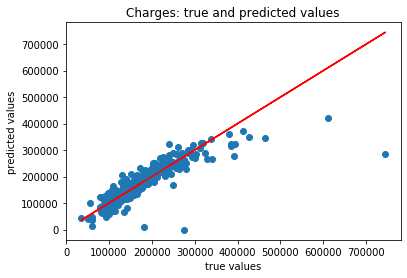

Mean absolute error of the prediction is: 23448.753425902934
Mean squared error of the prediction is: 1957796915.9581482
Root mean squared error of the prediction is: 44246.99894860835
Mean absolute percentage error of the prediction is: 13.251328914906074


In [44]:
# predict

X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)


plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# check if high values are outliers
# from plot below some high value outliers
# took out the two high value outliers and re-run the model

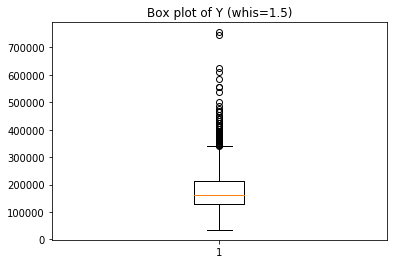

In [45]:
# from the plot above, I can see there are some outliers which have top values in Y, which negatively affect the predictions
# so I need to remove those outliers
# visualize the outliers first

plt.boxplot(Y)
plt.title("Box plot of Y (whis=1.5)")
plt.show()


In [46]:
# remove rows of outliers

df1 = pd.concat([X,Y],axis=1) 

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

revised_data=remove_outlier(df1,col_name='saleprice')

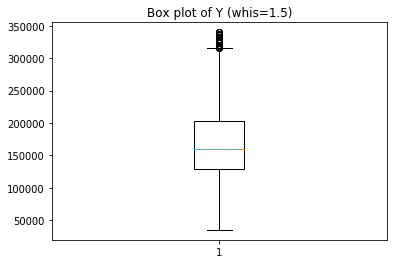

In [47]:
# plot to check outliers after removing

plt.boxplot(revised_data['saleprice'])
plt.title("Box plot of Y (whis=1.5)")
plt.show()


In [48]:
revised_data.info

<bound method DataFrame.info of       mszoning  street  lotshape  landcontour  utilities  lotconfig  \
0            0       1         0            0          0          0   
1            0       1         0            0          0          0   
2            0       1         0            0          0          0   
3            0       1         0            0          0          0   
4            0       1         0            0          0          0   
5            0       1         0            0          0          0   
6            0       1         0            0          0          0   
7            0       1         0            0          0          0   
8            0       1         0            0          0          0   
9            0       1         0            0          0          0   
10           0       1         0            0          0          0   
12           0       1         1            0          0          0   
13           0       1         0            0

In [49]:
# re-apply the model using revised_data

Y = revised_data['saleprice']
X = revised_data.iloc[:,0:73]

#pd.concat result in dataframe
#np.concatenate results in arrays

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())

The number of observations in the training set is 1119
The number of observations in the test set is 280
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     75.52
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:07:02   Log-Likelihood:                -12876.
No. Observations:                1119   AIC:                         2.589e+04
Df Residuals:                    1048   BIC:                         2.625e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

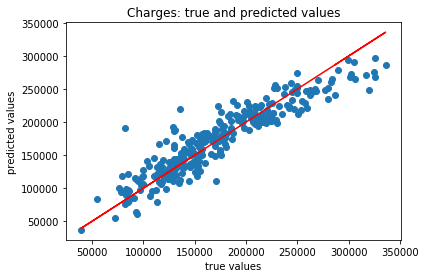

Mean absolute error of the prediction is: 17195.10021624523
Mean squared error of the prediction is: 511083820.69184613
Root mean squared error of the prediction is: 22607.163039440533
Mean absolute percentage error of the prediction is: 11.139289742412691


In [50]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)


plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [51]:
from sklearn.model_selection import KFold # import KFold

In [52]:

Y = revised_data['saleprice']
X = revised_data.iloc[:,0:73] 
print(len(revised_data))

kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

1399
KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [53]:
# apply cross validation on the model


for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X.iloc[train_index], X.iloc[test_index]
 y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
 X_train = sm.add_constant(X_train)
 results = sm.OLS(y_train, X_train).fit()
 print(results.summary())
 X_test = sm.add_constant(X_test)
 y_preds = results.predict(X_test)   


TRAIN: [ 280  281  282 ... 1396 1397 1398] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     83.63
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:07:03   Log-Likelihood:                -12813.
No. Observations:                1119   AIC:                         2.577e+04
Df Residuals:                    1048   BIC:                         2.612e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.053e+06   1.33e+05     -7.922

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     76.91
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:07:03   Log-Likelihood:                -12881.
No. Observations:                1119   AIC:                         2.590e+04
Df Residuals:                    1049   BIC:                         2.625e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -8.91e+05   1.39e+05     -6.423

In [54]:
# remove high p_values variables for the result above

In [55]:
list1=list(X.columns.values)

In [56]:
#all_list=column_list[0:37]+num_column_list
#print(all_list)
#print(len(all_list))
pvalue_set=list(results.pvalues.iloc[0:74])

#for var in all_list:
    #pvalue_set.append(results.pvalues.loc[var])

In [57]:
len(results.pvalues)

74

In [58]:
len(list1)

73

In [59]:
pvalue_df = pd.DataFrame(
    {'varname': list1,
     'pvalue': results.pvalues[1:]
    })

In [60]:
pvalue_df.head(10)

,varname,pvalue
mszoning,mszoning,0.004383
street,street,0.001086
lotshape,lotshape,0.731677
landcontour,landcontour,0.384527
utilities,utilities,0.091168
lotconfig,lotconfig,0.018849
landslope,landslope,0.000498
neighborhood,neighborhood,0.573402
condition1,condition1,0.058384
condition2,condition2,0.366578


In [61]:
indexNames = pvalue_df[ pvalue_df['pvalue'] >0.05 ].index
pvalue_df.drop(indexNames , inplace=True)
print(pvalue_df)

                   varname        pvalue
mszoning          mszoning  4.383421e-03
street              street  1.086101e-03
lotconfig        lotconfig  1.884881e-02
landslope        landslope  4.977206e-04
foundation      foundation  6.173245e-05
functional      functional  3.318542e-02
garagefinish  garagefinish  1.399617e-03
saletype          saletype  2.731460e-03
mssubclass      mssubclass  1.799222e-05
lotfrontage    lotfrontage  2.844242e-03
lotarea            lotarea  1.591161e-06
overallqual    overallqual  1.952680e-34
overallcond    overallcond  2.791920e-11
yearbuilt        yearbuilt  4.361748e-14
yearremodadd  yearremodadd  4.757909e-04
masvnrarea      masvnrarea  4.067163e-02
bsmtfinsf1      bsmtfinsf1  9.071185e-05
totalbsmtsf    totalbsmtsf  6.421077e-08
firstflrsf      firstflrsf  7.437320e-03
secondflrsf    secondflrsf  3.120751e-05
grlivarea        grlivarea  1.236096e-06
bsmtfullbath  bsmtfullbath  1.980084e-03
bedroomabvgr  bedroomabvgr  2.697284e-04
kitchenabvgr  ki

In [62]:
# Question
# Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which 
# features have a more prominent effect on house prices?

In [63]:
new_df = revised_data.filter(list(pvalue_df.varname), axis=1)
new_df.info()

print(len(new_df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 29 columns):
mszoning        1399 non-null uint8
street          1399 non-null uint8
lotconfig       1399 non-null uint8
landslope       1399 non-null uint8
foundation      1399 non-null uint8
functional      1399 non-null uint8
garagefinish    1399 non-null uint8
saletype        1399 non-null uint8
mssubclass      1399 non-null int64
lotfrontage     1399 non-null float64
lotarea         1399 non-null int64
overallqual     1399 non-null int64
overallcond     1399 non-null int64
yearbuilt       1399 non-null int64
yearremodadd    1399 non-null int64
masvnrarea      1399 non-null float64
bsmtfinsf1      1399 non-null int64
totalbsmtsf     1399 non-null int64
firstflrsf      1399 non-null int64
secondflrsf     1399 non-null int64
grlivarea       1399 non-null int64
bsmtfullbath    1399 non-null int64
bedroomabvgr    1399 non-null int64
kitchenabvgr    1399 non-null int64
totrmsabvgrd    1399 non-

In [64]:
#new_df = cat_hp_all.filter(['lotshape','lotconfig','condition1','roofstyle','masvnrtype','extercond','foundation','bsmtqual',
                            #'bsmtexposure','bsmtfintype1','centralair','functional','garagetype','garagefinish'], axis=1)

In [78]:

# filter numeric variables
p1=list(new_df.columns.values)
p1.remove('mszoning')
p1.remove('street')
p1.remove('landslope')
p1.remove('lotconfig')
p1.remove('foundation')
p1.remove('functional')
p1.remove('garagefinish')
p1.remove('saletype')# end up with p1 only include numeric varibales for creating new_df


new_df_num = new_df.filter(p1, axis=1)

# filter categorical variables
p2=['mszoning','street','landslope','lotconfig','foundation','functional','garagefinish','saletype']
new_df_cat=new_df.filter(p2, axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 29 columns):
mszoning        1399 non-null uint8
street          1399 non-null uint8
lotconfig       1399 non-null uint8
landslope       1399 non-null uint8
foundation      1399 non-null uint8
functional      1399 non-null uint8
garagefinish    1399 non-null uint8
saletype        1399 non-null uint8
mssubclass      1399 non-null int64
lotfrontage     1399 non-null float64
lotarea         1399 non-null int64
overallqual     1399 non-null int64
overallcond     1399 non-null int64
yearbuilt       1399 non-null int64
yearremodadd    1399 non-null int64
masvnrarea      1399 non-null float64
bsmtfinsf1      1399 non-null int64
totalbsmtsf     1399 non-null int64
firstflrsf      1399 non-null int64
secondflrsf     1399 non-null int64
grlivarea       1399 non-null int64
bsmtfullbath    1399 non-null int64
bedroomabvgr    1399 non-null int64
kitchenabvgr    1399 non-null int64
totrmsabvgrd    1399 non-

In [66]:

Y = revised_data['saleprice']
X=pd.concat([new_df_num,new_df_cat],axis=1) 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())
# try take out the p value = 0.247,0.401...and after taking out, re-run the model,might help improve

The number of observations in the training set is 1119
The number of observations in the test set is 280
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:07:04   Log-Likelihood:                -12930.
No. Observations:                1119   AIC:                         2.592e+04
Df Residuals:                    1089   BIC:                         2.607e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------

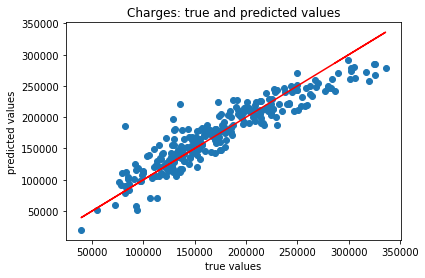

Mean absolute error of the prediction is: 16706.13029011843
Mean squared error of the prediction is: 494957332.03681225
Root mean squared error of the prediction is: 22247.636549458737
Mean absolute percentage error of the prediction is: 10.807796804546886


In [67]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)


plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [68]:
# comparing the two models, one with original all categorical variables(74 vairables), and one with selected variables(29 variables)
# from the adjust R-squared to see, frist model(74 variables) is better, first model adjust R-squared =0.824, and second model(29 variables) adjust R-squared is 0.813, 
# so first model is better on adjust R-squared, and about stats BIC, second model is better than fist mode, because first model(74 variables) BIC= 2.625e+04
# second model(29 vairables) BIC=2.607e+04

# regarding the four metrics of MASE,MSE,RMSE,MAPE, original model is better,because first model has smaller metrics values
# than second model

In [69]:
# metrics of first model
#Mean absolute error of the prediction is: 23353.457587078025
#Mean squared error of the prediction is: 1917904835.1876447
#Root mean squared error of the prediction is: 43793.89038653274
#Mean absolute percentage error of the prediction is: 13.301067581066317

In [70]:
# from the result above, it's clear to see this new model has some variables with high p-values, so next 
# I will remove these variables with high p-values.

In [71]:
results.pvalues

const           2.947454e-27
mssubclass      1.148172e-10
lotfrontage     3.996515e-02
lotarea         2.256945e-02
overallqual     4.625767e-44
overallcond     8.397951e-09
yearbuilt       5.254310e-18
yearremodadd    1.044979e-02
masvnrarea      1.521854e-01
bsmtfinsf1      3.162983e-01
totalbsmtsf     1.463570e-01
firstflrsf      4.076258e-01
secondflrsf     3.495669e-01
grlivarea       3.233115e-01
bsmtfullbath    4.213630e-09
bedroomabvgr    2.829770e-01
kitchenabvgr    6.680181e-02
totrmsabvgrd    1.692774e-02
fireplaces      4.529494e-09
garagearea      1.201498e-11
wooddecksf      6.258395e-03
screenporch     2.817378e-04
mszoning        1.069098e-02
street          1.405410e-02
landslope       1.930214e-05
lotconfig       1.317665e-02
foundation      3.116294e-03
functional      3.215311e-02
garagefinish    1.123139e-02
saletype        2.956128e-02
dtype: float64

In [72]:
list2=list(X.columns.values)

In [73]:
pvalue_df = pd.DataFrame(
    {'varname': list2,
     'pvalue': results.pvalues[1:]
    })

In [74]:
indexNames = pvalue_df[ pvalue_df['pvalue'] >0.05 ].index
pvalue_df.drop(indexNames , inplace=True)
print(pvalue_df)

                   varname        pvalue
mssubclass      mssubclass  1.148172e-10
lotfrontage    lotfrontage  3.996515e-02
lotarea            lotarea  2.256945e-02
overallqual    overallqual  4.625767e-44
overallcond    overallcond  8.397951e-09
yearbuilt        yearbuilt  5.254310e-18
yearremodadd  yearremodadd  1.044979e-02
bsmtfullbath  bsmtfullbath  4.213630e-09
totrmsabvgrd  totrmsabvgrd  1.692774e-02
fireplaces      fireplaces  4.529494e-09
garagearea      garagearea  1.201498e-11
wooddecksf      wooddecksf  6.258395e-03
screenporch    screenporch  2.817378e-04
mszoning          mszoning  1.069098e-02
street              street  1.405410e-02
landslope        landslope  1.930214e-05
lotconfig        lotconfig  1.317665e-02
foundation      foundation  3.116294e-03
functional      functional  3.215311e-02
garagefinish  garagefinish  1.123139e-02
saletype          saletype  2.956128e-02


In [75]:
# run the newest model with neweat version of data

new_df2 = new_df.filter(list(pvalue_df.varname), axis=1)
new_df2.info()


Y = revised_data['saleprice']
X = new_df2


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 21 columns):
mssubclass      1399 non-null int64
lotfrontage     1399 non-null float64
lotarea         1399 non-null int64
overallqual     1399 non-null int64
overallcond     1399 non-null int64
yearbuilt       1399 non-null int64
yearremodadd    1399 non-null int64
bsmtfullbath    1399 non-null int64
totrmsabvgrd    1399 non-null int64
fireplaces      1399 non-null int64
garagearea      1399 non-null int64
wooddecksf      1399 non-null int64
screenporch     1399 non-null int64
mszoning        1399 non-null uint8
street          1399 non-null uint8
landslope       1399 non-null uint8
lotconfig       1399 non-null uint8
foundation      1399 non-null uint8
functional      1399 non-null uint8
garagefinish    1399 non-null uint8
saletype        1399 non-null uint8
dtypes: float64(1), int64(12), uint8(8)
memory usage: 163.9 KB
The number of observations in the training set is 1119
The number of obs

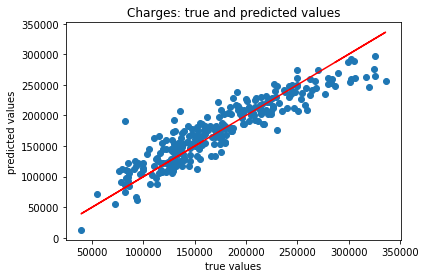

Mean absolute error of the prediction is: 18217.269141144356
Mean squared error of the prediction is: 563177062.1252128
Root mean squared error of the prediction is: 23731.351881534538
Mean absolute percentage error of the prediction is: 12.040898056624508


In [76]:
# predict

X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)


plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
# previous result

#Mean absolute error of the prediction is: 16706.13029011843
#Mean squared error of the prediction is: 494957332.03681225
#Root mean squared error of the prediction is: 22247.636549458737
#Mean absolute percentage error of the prediction is: 10.807796804546886

In [ ]:
# after removing high p-value variables from the new model with 29 variables, the newest model with 21 variables 
# performs not as good as model with 29 variables. the adjust r-squared for model with 21 variables is 0.795, but the model with 
# 29 variables has adjust r-squared is 0.813
# regarding the four metrics MAE,MSE, RMSE, and MAPE, the model with 29 variables is better

In [77]:
# add some interaction varibales
# but needs to check correlation matrix first

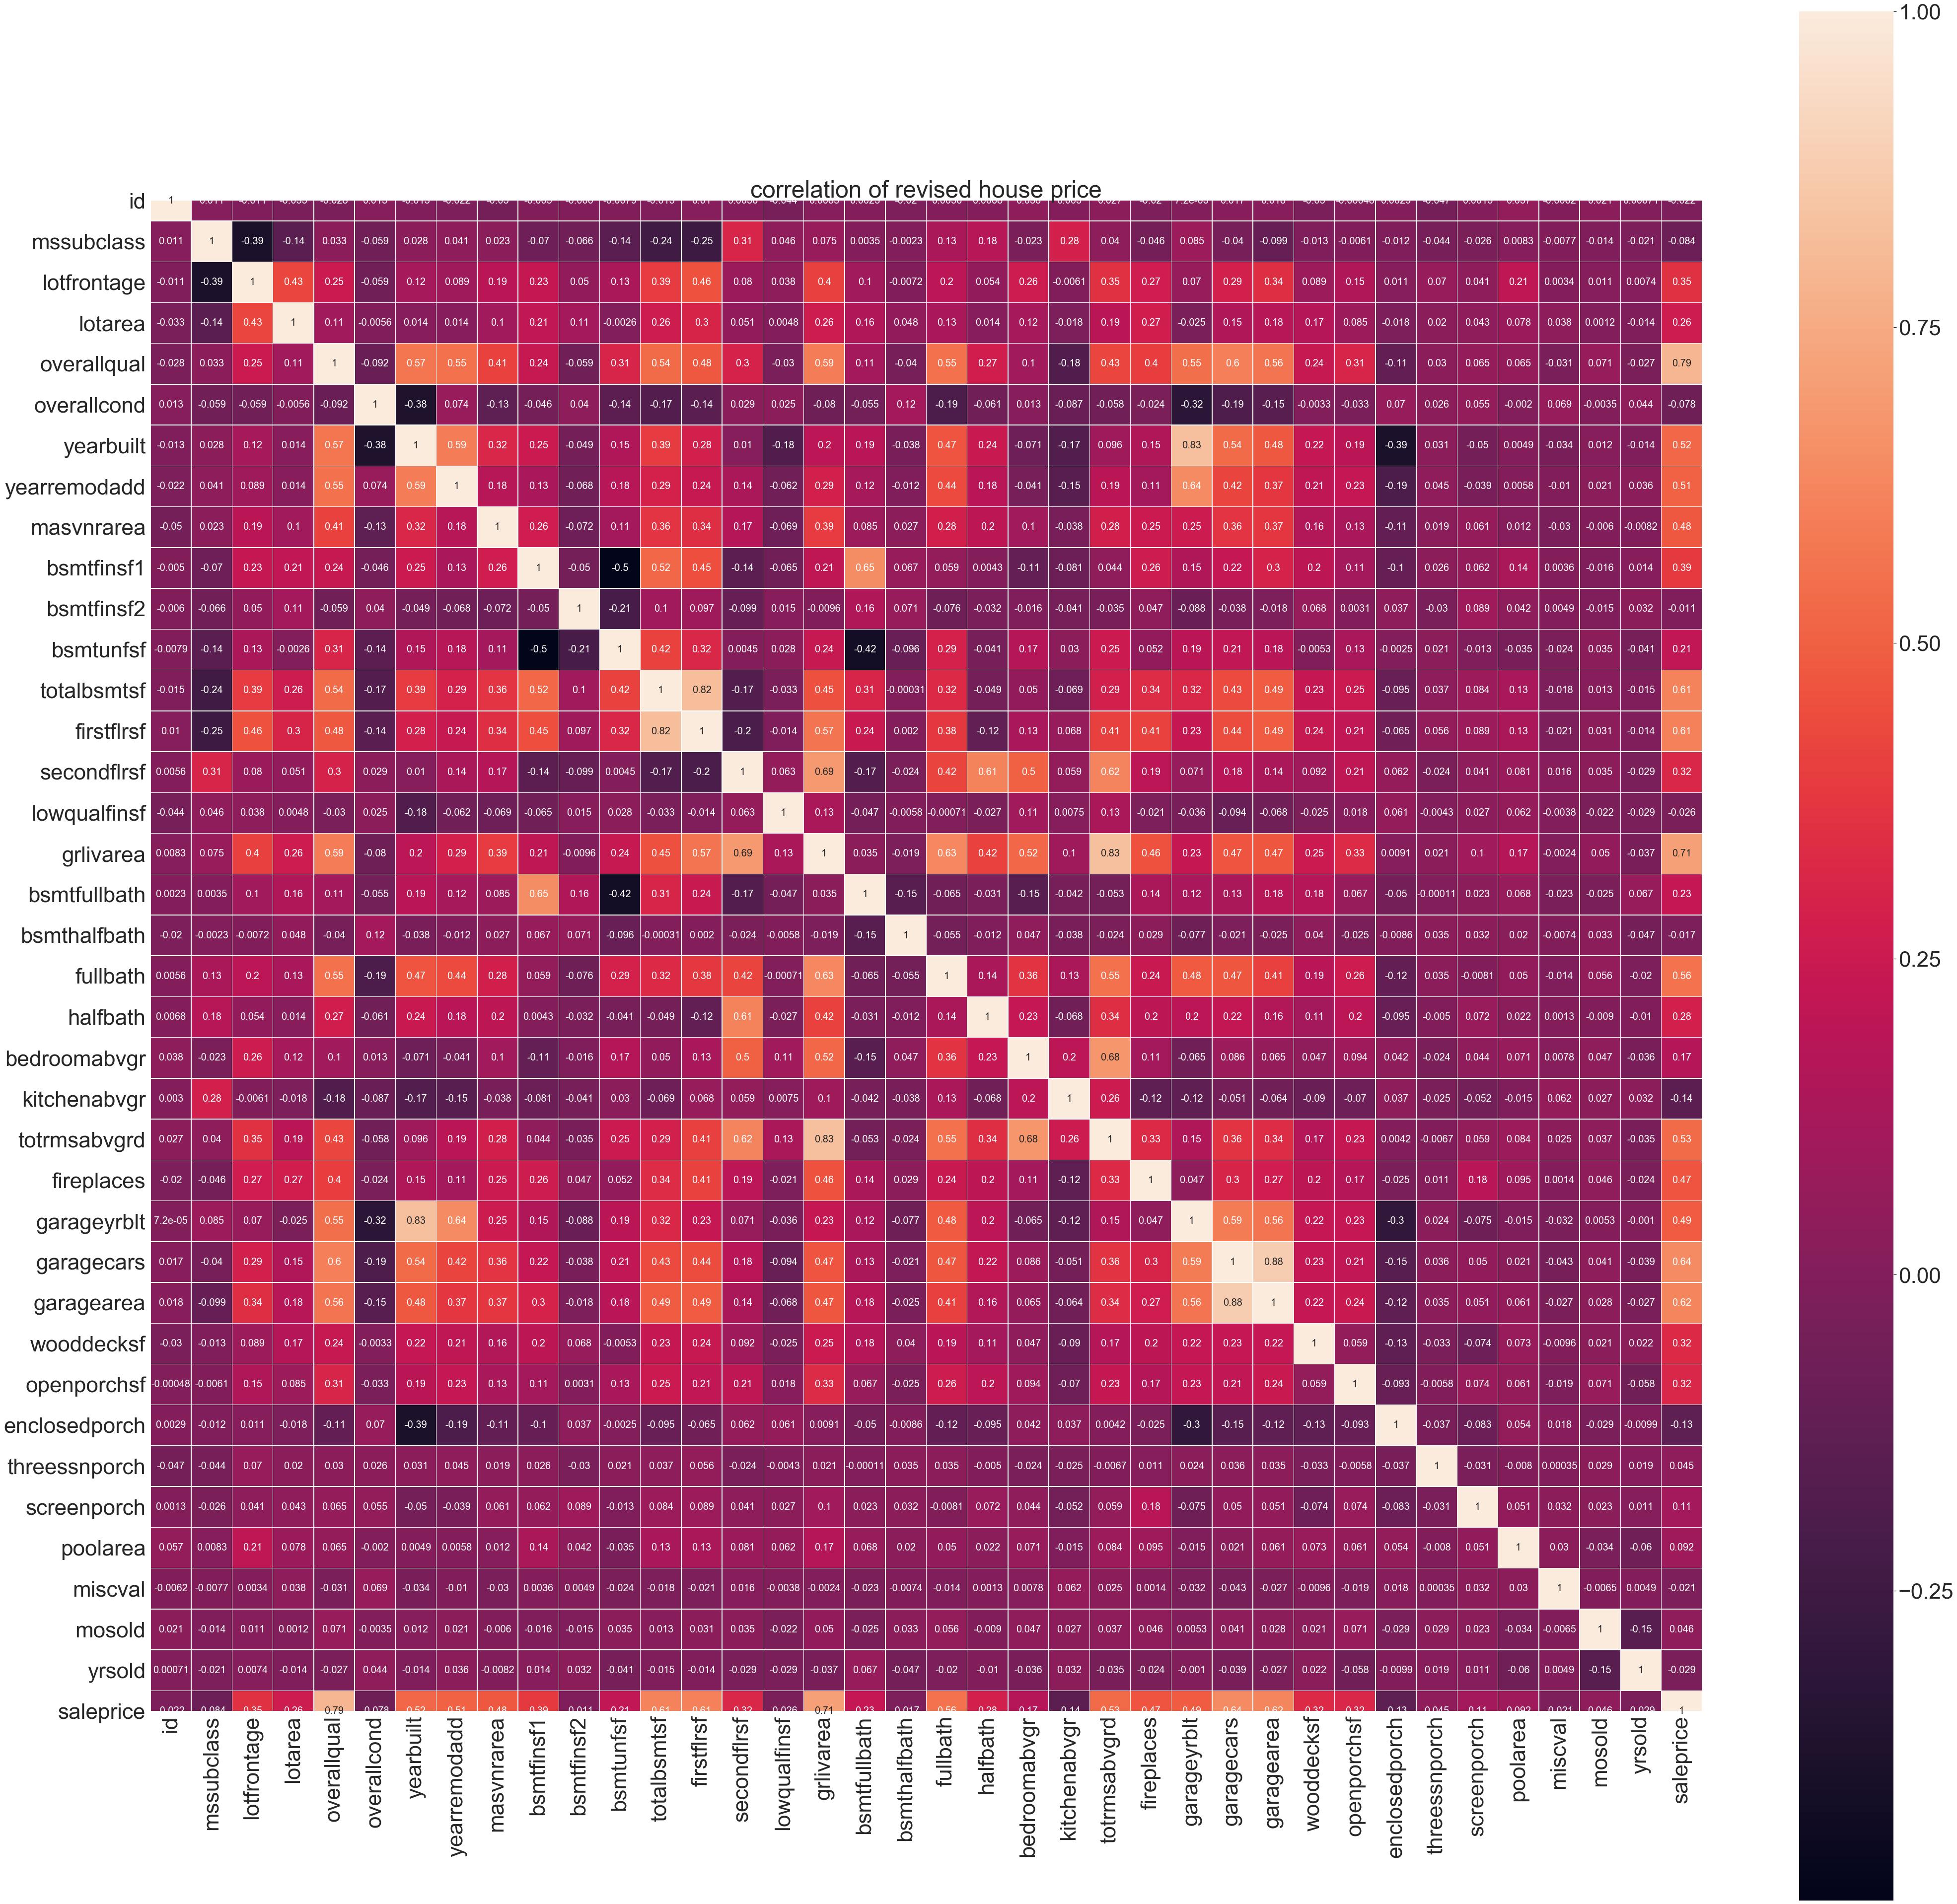

In [83]:
hp_cor=houseprice.corr()

plt.figure(figsize=(70,70))
sns.set(font_scale=4)
sns.heatmap(hp_cor, square=True, annot=True,linewidths=0.5, annot_kws={"size": 20})
plt.title('correlation of house price')
plt.show()

In [ ]:
# select the variables with high correlations
# garagecars vs garagearea
# garageyrblt vs yearblt
# totrmsabvgrd vs grlivarea


# add these three interactions into the previous model (with )

In [86]:
new_df['grlivarea']

0       1710
1       1262
2       1786
3       1717
4       2198
5       1362
6       1694
7       2090
8       1774
9       1077
10      1040
12       912
13      1494
14      1253
15       854
16      1004
17      1296
18      1114
19      1339
20      2376
21      1108
22      1795
23      1060
24      1060
25      1600
26       900
27      1704
28      1600
29       520
30      1317
        ... 
1429    1440
1430    1838
1431     958
1432     968
1433    1792
1434    1126
1435    1537
1436     864
1438    1236
1439    1725
1440    2555
1441     848
1442    2007
1443     952
1444    1422
1445     913
1446    1188
1447    2090
1448    1346
1449     630
1450    1792
1451    1578
1452    1072
1453    1140
1454    1221
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: grlivarea, Length: 1399, dtype: int64

In [87]:
# I'm going to use the model with 29 vairables

# since there are no variables named garagecars, and garageyrblt, yearbult, so I will only add one interaction which is 
# totrmsabvgrd vs grlivarea

# since totrmsabvgrd and grlivarea are both numeric variables, so interaction vairiable will be the product of these two
new_df["totrmsabvgrd_grlivarea"] = new_df.totrmsabvgrd * new_df.grlivarea
Y = revised_data['saleprice']
X3=new_df

X_train, X_test, y_train, y_test = train_test_split(X3, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())
# try take out the p value = 0.247,0.401...and after taking out, re-run the model,might help improve

The number of observations in the training set is 1119
The number of observations in the test set is 280
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:42:11   Log-Likelihood:                -12889.
No. Observations:                1119   AIC:                         2.584e+04
Df Residuals:                    1088   BIC:                         2.600e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [88]:
len(X3)

1399

In [90]:
 # and also try apply cross-validation on this new model which has 30 variable(including 1 interaction var)
    
kf = KFold(n_splits=3) # Define the split - into 5 folds 
kf.get_n_splits(X3) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=3, random_state=None, shuffle=False)    

    
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
  y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
  X_train = sm.add_constant(X_train)
  results = sm.OLS(y_train, X_train).fit()
  print(results.summary())
  X_test = sm.add_constant(X_test)
  y_preds = results.predict(X_test)   

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [ 467  468  469  470  471  472  473  474  475  476  477  478  479  480
  481  482  483  484  485  486  487  488  489  490  491  492  493  494
  495  496  497  498  499  500  501  502  503  504  505  506  507  508
  509  510  511  512  513  514  515  516  517  518  519  520  521  522
  523  524  525  526  527  528  529  530  531  532  533  534  535  536
  537  538  539  540  541  542  543  544  545  546  547  548  549  550
  551  552  553  554  555  556  557  558  559  560  561  562  563  564
  565  566  567  568  569  570  571  572  573  574  575  576  577  578
  579  580  581  582  583  584  585  586  587  588  589  590  591  592
  593  594  595  596  597  598  599  600  601  602  603  604  605  606
  607  608  609  610  611  612  613  614  615  616  617  618  619  620
  621  622  623  624  625  626  627  628  629  630  631  632  633  634
  635  636  637  638  639  640  641  642  643  644  645  646  647  648
  649  650  651  6

In [ ]:
# Conclusion 
# So far, the model with best performance is this last model, with 29 variables and 1 interaction variable
# the cross-validation(k=3) result are consistent, three adj r-squared values are 0.826,0.832,0.858, which 
#has highest adj r-squared values among all the models in this assignment